In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv(r'C:\Users\jayes\Downloads\ODI-data-1971-2017.csv')
df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [3]:
df = df.drop(['Scorecard','Match Date'],axis=1)

In [4]:
df.isnull().sum()

Team 1      0
Team 2      0
Winner      0
Margin    179
Ground      0
dtype: int64

In [5]:
df['Margin'].isnull().sum()

179

In [6]:
df['Margin']

0       5 wickets
1       6 wickets
2       5 wickets
3       2 wickets
4         22 runs
          ...    
3927    6 wickets
3928     200 runs
3929    9 wickets
3930    6 wickets
3931       6 runs
Name: Margin, Length: 3932, dtype: object

In [7]:
df.shape

(3932, 5)

In [8]:
df.isnull().sum()

Team 1      0
Team 2      0
Winner      0
Margin    179
Ground      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team 1  3932 non-null   object
 1   Team 2  3932 non-null   object
 2   Winner  3932 non-null   object
 3   Margin  3753 non-null   object
 4   Ground  3932 non-null   object
dtypes: object(5)
memory usage: 153.7+ KB


In [10]:
df

,Team 1,Team 2,Winner,Margin,Ground
0,Australia,England,Australia,5 wickets,Melbourne
1,England,Australia,England,6 wickets,Manchester
2,England,Australia,Australia,5 wickets,Lord's
3,England,Australia,England,2 wickets,Birmingham
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch
...,...,...,...,...,...
3927,India,New Zealand,New Zealand,6 wickets,Mumbai
3928,South Africa,Bangladesh,South Africa,200 runs,East London
3929,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah
3930,India,New Zealand,India,6 wickets,Pune


In [11]:
df.columns

Index(['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground'], dtype='object')

In [12]:
df['Team 1'].unique()

array(['Australia', 'England', 'New Zealand', 'East Africa', 'Sri Lanka',
       'Pakistan', 'India', 'West Indies', 'Canada', 'Bangladesh',
       'South Africa', 'Zimbabwe', 'U.A.E.', 'Netherlands', 'Kenya',
       'Scotland', 'Namibia', 'Hong Kong', 'Asia XI', 'Africa XI',
       'Bermuda', 'Ireland', 'Afghanistan', 'P.N.G.'], dtype=object)

In [13]:
df['Team 1'].value_counts()

Australia       583
India           562
England         393
New Zealand     392
Pakistan        382
Sri Lanka       300
South Africa    279
West Indies     260
Bangladesh      213
Zimbabwe        196
Kenya            81
Ireland          72
Canada           50
Scotland         40
Afghanistan      38
Netherlands      34
Bermuda          17
U.A.E.           17
Hong Kong        10
Africa XI         6
Namibia           2
East Africa       2
P.N.G.            2
Asia XI           1
Name: Team 1, dtype: int64

In [14]:
df['Team 1'].values

array(['Australia', 'England', 'England', ..., 'Pakistan', 'India',
       'India'], dtype=object)

In [15]:
df['Team 2'].unique()

array(['England', 'Australia', 'Pakistan', 'New Zealand', 'West Indies',
       'India', 'Sri Lanka', 'East Africa', 'Canada', 'Zimbabwe',
       'Bangladesh', 'South Africa', 'U.A.E.', 'Kenya', 'Netherlands',
       'Scotland', 'Namibia', 'Hong Kong', 'U.S.A.', 'ICC World XI',
       'Asia XI', 'Ireland', 'Bermuda', 'Afghanistan', 'P.N.G.'],
      dtype=object)

In [16]:
df['Team 2'].value_counts()

Sri Lanka       508
West Indies     507
Pakistan        502
India           368
New Zealand     339
Australia       323
England         304
South Africa    304
Zimbabwe        295
Bangladesh      122
Kenya            73
Scotland         53
Ireland          51
Afghanistan      45
Netherlands      42
Canada           27
Bermuda          18
U.A.E.           18
Hong Kong         8
P.N.G.            8
Asia XI           6
ICC World XI      4
Namibia           4
U.S.A.            2
East Africa       1
Name: Team 2, dtype: int64

In [17]:
df

,Team 1,Team 2,Winner,Margin,Ground
0,Australia,England,Australia,5 wickets,Melbourne
1,England,Australia,England,6 wickets,Manchester
2,England,Australia,Australia,5 wickets,Lord's
3,England,Australia,England,2 wickets,Birmingham
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch
...,...,...,...,...,...
3927,India,New Zealand,New Zealand,6 wickets,Mumbai
3928,South Africa,Bangladesh,South Africa,200 runs,East London
3929,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah
3930,India,New Zealand,India,6 wickets,Pune


In [18]:
import scipy.stats as stats

In [19]:
cont = pd.crosstab(df['Team 1'] , df['Winner'] , normalize='index')
cont

Winner,Afghanistan,Africa XI,Asia XI,Australia,Bangladesh,Bermuda,Canada,England,Hong Kong,ICC World XI,...,P.N.G.,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe,no result,tied
Team 1,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.526316,0.000000,0.000000,0.026316,0.026316,0.000000,0.026316,0.026316,0.000000,0.0,...,0.000000,0.052632,0.052632,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000
Africa XI,0.000000,0.166667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000
Asia XI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.000000,0.000000,0.000000,0.656947,0.001715,0.000000,0.000000,0.039451,0.000000,0.0,...,0.000000,0.048027,0.000000,0.039451,0.030875,0.000000,0.072041,0.001715,0.036021,0.006861
Bangladesh,0.009390,0.000000,0.000000,0.028169,0.366197,0.000000,0.004695,0.046948,0.000000,0.0,...,0.000000,0.093897,0.000000,0.037559,0.089202,0.000000,0.056338,0.061033,0.014085,0.000000
Bermuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.176471,0.235294,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.117647,0.000000,0.000000
Canada,0.040000,0.000000,0.000000,0.000000,0.000000,0.080000,0.180000,0.020000,0.000000,0.0,...,0.000000,0.040000,0.100000,0.000000,0.020000,0.000000,0.060000,0.040000,0.040000,0.000000
East Africa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
England,0.000000,0.000000,0.000000,0.076336,0.002545,0.000000,0.000000,0.562341,0.000000,0.0,...,0.000000,0.053435,0.000000,0.030534,0.048346,0.000000,0.053435,0.012723,0.038168,0.010178


In [20]:
from scipy.stats import chi2_contingency

c , p , dof,expected = chi2_contingency(cont)

In [21]:
p

1.0

In [22]:
c

163.4741233738222

In [23]:
dof

552

In [24]:
cont2 = pd.crosstab(df['Team 2'] , df['Winner'] , normalize='index')
cont2

Winner,Afghanistan,Africa XI,Asia XI,Australia,Bangladesh,Bermuda,Canada,England,Hong Kong,ICC World XI,...,P.N.G.,Pakistan,Scotland,South Africa,Sri Lanka,U.A.E.,West Indies,Zimbabwe,no result,tied
Team 2,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.488889,0.000000,0.000000,0.022222,0.044444,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.022222,0.000000,0.000000,0.066667,0.022222,0.133333,0.044444,0.000000
Asia XI,0.000000,0.166667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000
Australia,0.000000,0.000000,0.000000,0.532508,0.000000,0.000000,0.000000,0.089783,0.000000,0.00,...,0.000000,0.012384,0.000000,0.068111,0.043344,0.000000,0.055728,0.003096,0.040248,0.015480
Bangladesh,0.000000,0.000000,0.000000,0.098361,0.221311,0.000000,0.000000,0.049180,0.000000,0.00,...,0.000000,0.090164,0.000000,0.073770,0.122951,0.000000,0.057377,0.122951,0.032787,0.000000
Bermuda,0.000000,0.000000,0.000000,0.000000,0.111111,0.222222,0.111111,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Canada,0.074074,0.000000,0.000000,0.074074,0.037037,0.037037,0.296296,0.037037,0.000000,0.00,...,0.000000,0.000000,0.074074,0.037037,0.037037,0.000000,0.037037,0.000000,0.000000,0.000000
East Africa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
England,0.000000,0.000000,0.000000,0.164474,0.009868,0.000000,0.000000,0.401316,0.000000,0.00,...,0.000000,0.032895,0.000000,0.055921,0.049342,0.000000,0.069079,0.009868,0.029605,0.013158
Hong Kong,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.250000,0.00,...,0.000000,0.125000,0.125000,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000


In [25]:
c , p , dof,expected = chi2_contingency(cont2)

In [26]:
p

1.0

In [27]:
c

129.9843097194427

In [28]:
dof

576

In [29]:
df

,Team 1,Team 2,Winner,Margin,Ground
0,Australia,England,Australia,5 wickets,Melbourne
1,England,Australia,England,6 wickets,Manchester
2,England,Australia,Australia,5 wickets,Lord's
3,England,Australia,England,2 wickets,Birmingham
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch
...,...,...,...,...,...
3927,India,New Zealand,New Zealand,6 wickets,Mumbai
3928,South Africa,Bangladesh,South Africa,200 runs,East London
3929,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah
3930,India,New Zealand,India,6 wickets,Pune


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
a = df.groupby('Team 1').first()
a

,Team 2,Winner,Margin,Ground
Team 1,,,,
Afghanistan,Scotland,Afghanistan,89 runs,Benoni
Africa XI,Asia XI,Africa XI,2 runs,Centurion
Asia XI,ICC World XI,ICC World XI,112 runs,Melbourne
Australia,England,Australia,5 wickets,Melbourne
Bangladesh,Pakistan,Pakistan,7 wickets,Moratuwa
Bermuda,Canada,Bermuda,3 wickets,Port of Spain
Canada,Pakistan,Pakistan,8 wickets,Leeds
East Africa,New Zealand,New Zealand,181 runs,Birmingham
England,Australia,England,6 wickets,Manchester


<AxesSubplot:xlabel='Team 1'>

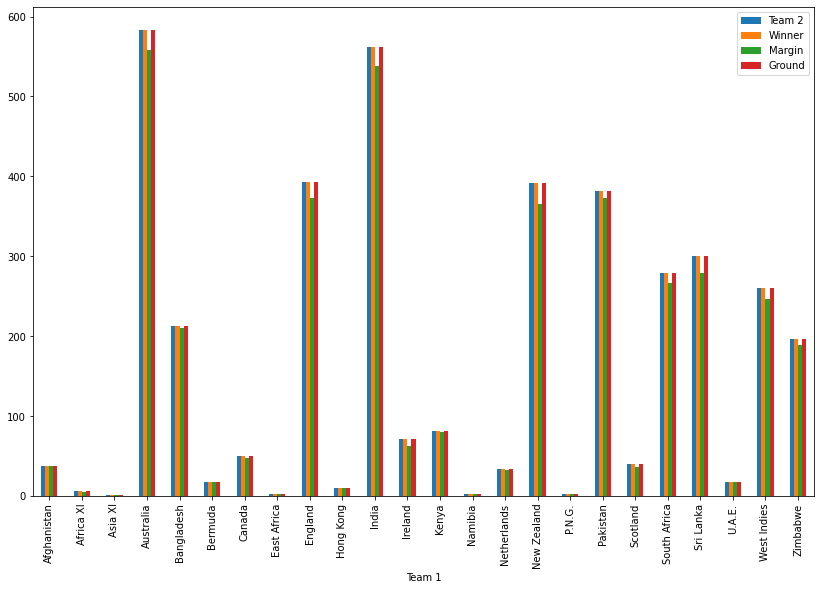

In [32]:
df.groupby('Team 1').count().plot(kind='bar',figsize=(14,9))

In [33]:
a = df.groupby('Team 1').count()
a

,Team 2,Winner,Margin,Ground
Team 1,,,,
Afghanistan,38,38,38,38
Africa XI,6,6,5,6
Asia XI,1,1,1,1
Australia,583,583,558,583
Bangladesh,213,213,210,213
Bermuda,17,17,17,17
Canada,50,50,48,50
East Africa,2,2,2,2
England,393,393,373,393


<AxesSubplot:xlabel='Team 2'>

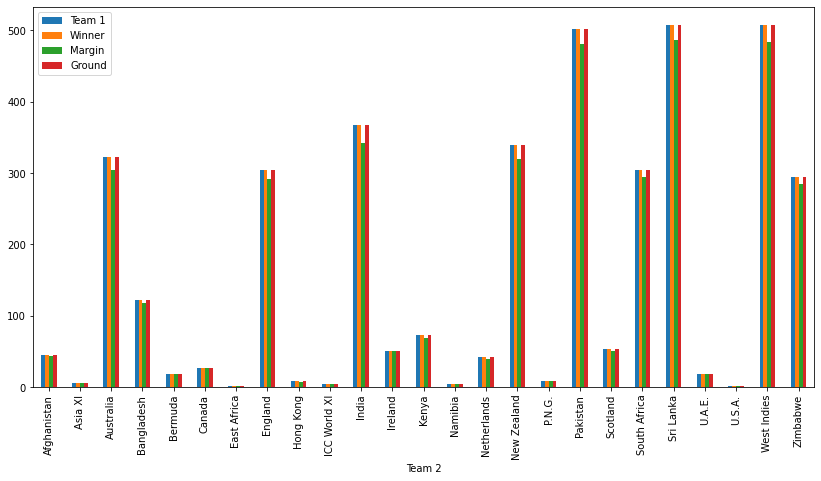

In [34]:
df.groupby('Team 2').count().plot(kind='bar',figsize=(14,7))

In [35]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [36]:
cont = pd.crosstab(df['Team 1'] , df['Winner'])

In [37]:
observed_val = cont.values
    
b = chi2_contingency(cont)
expected_val = b[3]
    
no_of_rows = len(cont.iloc[0: , 0])
no_of_cols = len(cont.iloc[0,0:])
dof = (no_of_rows-1)*(no_of_cols-1)
print('dof : ',dof)
    
    
alpha = 0.05
print('Significance : ',alpha)
    
    
chi_square = sum([(o-e)**2/e for o,e in zip(observed_val,expected_val)])
chi_square_statistic = chi_square[0]+chi_square[1]
print('chi_square statistic = ',chi_square_statistic)
    

dof :  552
Significance :  0.05
chi_square statistic =  1683.981447748743


In [38]:
critical_value = chi2.ppf(q=1-alpha,df = dof)
print('critical Values = ', critical_value)
    
    
p_val = chi2.cdf(x=chi_square_statistic,df=dof)
print(' p value = ',p_val)
    
    
if chi_square_statistic>critical_value:
    print('reject h0, there is relationship btn 2 variables')
else:
    print('retain h0, there is no  relationship btn 2 variables')

    
if p_val<=alpha:
    print('reject h0, there is relationship btn 2 variables')
else:
    print('retain h0, there is no  relationship btn 2 variables')


critical Values =  607.7659119179774
 p value =  1.0
reject h0, there is relationship btn 2 variables
retain h0, there is no  relationship btn 2 variables


In [39]:
cont2 = pd.crosstab(df['Team 1'] , df['Winner'])

In [40]:
observed_val = cont2.values
    
b = chi2_contingency(cont2)
expected_val = b[3]
    
no_of_rows = len(cont.iloc[0: , 0])
no_of_cols = len(cont.iloc[0,0:])
dof = (no_of_rows-1)*(no_of_cols-1)
print('dof : ',dof)
    
    
alpha = 0.05
print('Significance : ',alpha)
    
    
chi_square = sum([(o-e)**2/e for o,e in zip(observed_val,expected_val)])
chi_square_statistic = chi_square[0]+chi_square[1]
print('chi_square statistic = ',chi_square_statistic)

critical_value = chi2.ppf(q=1-alpha,df = dof)
print('critical Values = ', critical_value)
    
    
p_val = chi2.cdf(x=chi_square_statistic,df=dof)
print(' p value = ',p_val)
    
    
if chi_square_statistic>critical_value:
    print('reject h0, there is relationship btn 2 variables')
else:
    print('retain h0, there is no  relationship btn 2 variables')

    
if p_val<=alpha:
    print('reject h0, there is relationship btn 2 variables')
else:
    print('retain h0, there is no  relationship btn 2 variables')

    

dof :  552
Significance :  0.05
chi_square statistic =  1683.981447748743
critical Values =  607.7659119179774
 p value =  1.0
reject h0, there is relationship btn 2 variables
retain h0, there is no  relationship btn 2 variables


In [41]:
df.isnull().sum()

Team 1      0
Team 2      0
Winner      0
Margin    179
Ground      0
dtype: int64

In [42]:
df.shape

(3932, 5)

In [43]:
df = df.dropna()

In [44]:
df.shape

(3753, 5)

In [45]:
df.reset_index(inplace=True)

In [46]:
df.head()

,index,Team 1,Team 2,Winner,Margin,Ground
0,0,Australia,England,Australia,5 wickets,Melbourne
1,1,England,Australia,England,6 wickets,Manchester
2,2,England,Australia,Australia,5 wickets,Lord's
3,3,England,Australia,England,2 wickets,Birmingham
4,4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch


In [47]:
df = df.drop(['index'],axis=1)

In [48]:
df.columns

Index(['Team 1', 'Team 2', 'Winner', 'Margin', 'Ground'], dtype='object')

In [49]:
df['Margin']

0       5 wickets
1       6 wickets
2       5 wickets
3       2 wickets
4         22 runs
          ...    
3748    6 wickets
3749     200 runs
3750    9 wickets
3751    6 wickets
3752       6 runs
Name: Margin, Length: 3753, dtype: object

In [50]:
for margin in df['Margin'].astype(str):
    splitted_data = margin.split(' ')

In [51]:
splitted_data

['6', 'runs']

In [52]:
splitted_data[0]

'6'

In [53]:
splitted_data[1]

'runs'

In [54]:
won_by_runs = []

won_by_wickets = []

for margin in df['Margin'].astype(str):
    splitted_data = margin.split(' ')
    try:
        index = splitted_data.index('runs')
        
        won_by_runs.append(eval(splitted_data[0]))
        
        won_by_wickets.append(0)
    except:
        print('-')
        
        
    try:
        index = splitted_data.index('run')
        
        won_by_runs.append(eval(splitted_data[0]))
        
        won_by_wickets.append(0)
    except:
        print('-')
        
    try:
        index = splitted_data.index('wickets')
        
        won_by_wickets.append(eval(splitted_data[0]))
        
        won_by_runs.append(0)
    except:
        print('-')
        
        
    try:
        index = splitted_data.index('wicket')
        
        won_by_wickets.append(eval(splitted_data[0]))
        
        won_by_runs.append(0)
    except:
        print('-')
        
        
df['won_by_runs'] = won_by_runs


df['won_by_wickets'] = won_by_wickets

df
    
    
    

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


,Team 1,Team 2,Winner,Margin,Ground,won_by_runs,won_by_wickets
0,Australia,England,Australia,5 wickets,Melbourne,0,5
1,England,Australia,England,6 wickets,Manchester,0,6
2,England,Australia,Australia,5 wickets,Lord's,0,5
3,England,Australia,England,2 wickets,Birmingham,0,2
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,22,0
...,...,...,...,...,...,...,...
3748,India,New Zealand,New Zealand,6 wickets,Mumbai,0,6
3749,South Africa,Bangladesh,South Africa,200 runs,East London,200,0
3750,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,0,9
3751,India,New Zealand,India,6 wickets,Pune,0,6


In [55]:
df

,Team 1,Team 2,Winner,Margin,Ground,won_by_runs,won_by_wickets
0,Australia,England,Australia,5 wickets,Melbourne,0,5
1,England,Australia,England,6 wickets,Manchester,0,6
2,England,Australia,Australia,5 wickets,Lord's,0,5
3,England,Australia,England,2 wickets,Birmingham,0,2
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,22,0
...,...,...,...,...,...,...,...
3748,India,New Zealand,New Zealand,6 wickets,Mumbai,0,6
3749,South Africa,Bangladesh,South Africa,200 runs,East London,200,0
3750,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,0,9
3751,India,New Zealand,India,6 wickets,Pune,0,6


In [56]:
winning_team = []

for team1 , team2 , winner in zip(df['Team 1'] , df['Team 2'] , df['Winner']):
    
    if winner==team1:
        winning_team.append(team1)
    
    
    if winner==team2:
        winning_team.append(team2)
        
df['winning_team'] = winning_team
        
df      

,Team 1,Team 2,Winner,Margin,Ground,won_by_runs,won_by_wickets,winning_team
0,Australia,England,Australia,5 wickets,Melbourne,0,5,Australia
1,England,Australia,England,6 wickets,Manchester,0,6,England
2,England,Australia,Australia,5 wickets,Lord's,0,5,Australia
3,England,Australia,England,2 wickets,Birmingham,0,2,England
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,22,0,New Zealand
...,...,...,...,...,...,...,...,...
3748,India,New Zealand,New Zealand,6 wickets,Mumbai,0,6,New Zealand
3749,South Africa,Bangladesh,South Africa,200 runs,East London,200,0,South Africa
3750,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,0,9,Pakistan
3751,India,New Zealand,India,6 wickets,Pune,0,6,India


In [57]:
team1_first_batting = []


team2_first_batting = []

for  team1 , team2 , winner , runs,wickets  in zip(df['Team 1'],df['Team 2'] , df['Winner'] ,df['won_by_runs'],df['won_by_wickets']):
  
    if  runs >0 and winner==team1:
        

        team1_first_batting.append(1)
        
        team2_first_batting.append(0)
        
   
    if runs > 0 and winner==team2:
        team2_first_batting.append(1)
        
        team1_first_batting.append(0)
  
    
   
    if wickets > 0 and winner==team1:
        
        team1_first_batting.append(0)
        
        team2_first_batting.append(1)
        

    
    if wickets> 0 and winner==team2:
        
        team1_first_batting.append(1)
        
        team2_first_batting.append(0)
        
df['Team_1_first_batting'] = team1_first_batting

df['Team_2_first_batting'] = team2_first_batting


In [58]:
df

,Team 1,Team 2,Winner,Margin,Ground,won_by_runs,won_by_wickets,winning_team,Team_1_first_batting,Team_2_first_batting
0,Australia,England,Australia,5 wickets,Melbourne,0,5,Australia,0,1
1,England,Australia,England,6 wickets,Manchester,0,6,England,0,1
2,England,Australia,Australia,5 wickets,Lord's,0,5,Australia,1,0
3,England,Australia,England,2 wickets,Birmingham,0,2,England,0,1
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,22,0,New Zealand,1,0
...,...,...,...,...,...,...,...,...,...,...
3748,India,New Zealand,New Zealand,6 wickets,Mumbai,0,6,New Zealand,1,0
3749,South Africa,Bangladesh,South Africa,200 runs,East London,200,0,South Africa,1,0
3750,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,0,9,Pakistan,0,1
3751,India,New Zealand,India,6 wickets,Pune,0,6,India,0,1


In [59]:
winning_team = []


for  team1 , team2 , winner  in zip(df['Team 1'],df['Team 2'] , df['Winner']):
    
    if winner==team1:
        
        winning_team.append(1)
        
        

        
    if winner==team2:
        
        winning_team.append(2)

        

df['Winning_team'] = winning_team
df

,Team 1,Team 2,Winner,Margin,Ground,won_by_runs,won_by_wickets,winning_team,Team_1_first_batting,Team_2_first_batting,Winning_team
0,Australia,England,Australia,5 wickets,Melbourne,0,5,Australia,0,1,1
1,England,Australia,England,6 wickets,Manchester,0,6,England,0,1,1
2,England,Australia,Australia,5 wickets,Lord's,0,5,Australia,1,0,2
3,England,Australia,England,2 wickets,Birmingham,0,2,England,0,1,1
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,22,0,New Zealand,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3748,India,New Zealand,New Zealand,6 wickets,Mumbai,0,6,New Zealand,1,0,2
3749,South Africa,Bangladesh,South Africa,200 runs,East London,200,0,South Africa,1,0,1
3750,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,0,9,Pakistan,0,1,1
3751,India,New Zealand,India,6 wickets,Pune,0,6,India,0,1,1


In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
def scale_data(df,col):
    # Instantiate MinMaxScaler
    mx = MinMaxScaler()
    
    # fit transform the data 
    df[col] =mx.fit_transform(df[col])
    
    
    # return scaled dataframe
    
    return df

In [62]:
sc_data = ['won_by_runs','won_by_wickets']

# passing data and name for scaling
scale_data(df,sc_data)

,Team 1,Team 2,Winner,Margin,Ground,won_by_runs,won_by_wickets,winning_team,Team_1_first_batting,Team_2_first_batting,Winning_team
0,Australia,England,Australia,5 wickets,Melbourne,0.000000,0.5,Australia,0,1,1
1,England,Australia,England,6 wickets,Manchester,0.000000,0.6,England,0,1,1
2,England,Australia,Australia,5 wickets,Lord's,0.000000,0.5,Australia,1,0,2
3,England,Australia,England,2 wickets,Birmingham,0.000000,0.2,England,0,1,1
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,0.075862,0.0,New Zealand,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3748,India,New Zealand,New Zealand,6 wickets,Mumbai,0.000000,0.6,New Zealand,1,0,2
3749,South Africa,Bangladesh,South Africa,200 runs,East London,0.689655,0.0,South Africa,1,0,1
3750,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,0.000000,0.9,Pakistan,0,1,1
3751,India,New Zealand,India,6 wickets,Pune,0.000000,0.6,India,0,1,1


In [63]:
data = pd.get_dummies(df,columns=['Team 1','Team 2'])

In [64]:
data = data.copy()

In [65]:
x = data.drop(['Winner','Margin','Ground','Winning_team','winning_team'],axis=1)

In [66]:
x.head()

,won_by_runs,won_by_wickets,Team_1_first_batting,Team_2_first_batting,Team 1_Afghanistan,Team 1_Africa XI,Team 1_Asia XI,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,...,Team 2_New Zealand,Team 2_P.N.G.,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,0.000000,0.5,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.6,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.075862,0.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
y = data['Winning_team']

In [68]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: Winning_team, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [71]:
x_train.shape

(3002, 53)

In [72]:
x_test.shape

(751, 53)

In [73]:
y_train.shape

(3002,)

In [74]:
y_test.shape

(751,)

In [75]:
from sklearn.metrics import  accuracy_score

import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train, y_train)

sc1 = xgb.score(x_train, y_train)

sc2 = xgb.score(x_test, y_test)


print('train ',sc1)
print('test ',sc2)

[20:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train  1.0
test  1.0


In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)

rf_classifier.fit(x_train, y_train)

sc11 = rf_classifier.score(x_train, y_train)

sc22 = rf_classifier.score(x_test, y_test)


print('Acc of training set  = ',sc11)

print('Acc of test set  = ',sc22)

Acc of training set  =  1.0
Acc of test set  =  0.9893475366178429


In [77]:
from sklearn.linear_model import LogisticRegression

lr_classifier2 = LogisticRegression(random_state = 51)
lr_classifier2.fit(x_train, y_train)

sc31 = lr_classifier2.score(x_train, y_train)

sc32 = lr_classifier2.score(x_test, y_test)

print('Acc of training set  = ',sc31)

print('Acc of test set  = ',sc32)


Acc of training set  =  0.6489007328447701
Acc of test set  =  0.6271637816245007


In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

sc41 = knn_classifier.score(x_train, y_train)

sc42 = knn_classifier.score(x_test, y_test)

print('Acc of training set  = ',sc41)

print('Acc of test set  = ',sc42)


Acc of training set  =  0.9586942038640907
Acc of test set  =  0.9161118508655126


In [79]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

sc51 = svc_classifier.score(x_train, y_train)

sc52 = svc_classifier.score(x_test, y_test)

print('Acc of training set  = ',sc51)

print('Acc of test set  = ',sc52)

Acc of training set  =  0.9806795469686875
Acc of test set  =  0.9773635153129161


In [80]:
f_df = df[['Team 1','Team 2','Winner']]

In [81]:
df['Winning_team']

0       1
1       1
2       2
3       1
4       1
       ..
3748    2
3749    1
3750    1
3751    1
3752    1
Name: Winning_team, Length: 3753, dtype: int64

In [82]:
x.shape

(3753, 53)

In [83]:
predicted_winner = svc_classifier.predict(x)

res = pd.DataFrame()


res['Actual_val'] = y

res['Predicted_val'] = predicted_winner


res

,Actual_val,Predicted_val
0,1,1
1,1,1
2,2,2
3,1,1
4,1,1
...,...,...
3748,2,2
3749,1,1
3750,1,1
3751,1,1


In [84]:

predicted_winner = svc_classifier.predict(x)

res = pd.DataFrame()


res['Actual_val'] = y

res['Predicted_val'] = predicted_winner


pred_winner = []


for pred , team1,team2 in zip(res['Predicted_val'] ,df['Team 1'], df['Team 2']): 
    if pred==1:
        pred_winner.append(team1)
    if pred==2:
        pred_winner.append(team2)
        
        
        
res['Predicted_winner'] = pred_winner
res

,Actual_val,Predicted_val,Predicted_winner
0,1,1,Australia
1,1,1,England
2,2,2,Australia
3,1,1,England
4,1,1,New Zealand
...,...,...,...
3748,2,2,New Zealand
3749,1,1,South Africa
3750,1,1,Pakistan
3751,1,1,India


In [90]:
df['Team 1'].unique()

array(['Australia', 'England', 'New Zealand', 'East Africa', 'Sri Lanka',
       'Pakistan', 'India', 'West Indies', 'Canada', 'Bangladesh',
       'South Africa', 'Zimbabwe', 'U.A.E.', 'Netherlands', 'Kenya',
       'Scotland', 'Namibia', 'Hong Kong', 'Asia XI', 'Africa XI',
       'Bermuda', 'Ireland', 'Afghanistan', 'P.N.G.'], dtype=object)

In [86]:
import pickle 

In [87]:
pickle.dump(df.to_dict() , open('odi_dict1.pkl','wb'))

In [91]:
res['Predicted_winner']

0          Australia
1            England
2          Australia
3            England
4        New Zealand
            ...     
3748     New Zealand
3749    South Africa
3750        Pakistan
3751           India
3752           India
Name: Predicted_winner, Length: 3753, dtype: object